In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import scikitplot as skplt

import matplotlib.pyplot as plt
import graphviz
import pandas as pd


In [ ]:
print('1)')
df = pd.read_csv('wq-r.csv', delimiter=';')
print(f'1) Дані:\n{df}\n')

In [ ]:
print('2)')
print(f'Кількість записів: {df.shape[0]}')
print(f'Кількість полів: {df.shape[1]}')

In [ ]:
print('3)')
print(df.head(10))

In [ ]:
print('4)')
X = df.drop('quality', axis=1)   # вихідні аргументи (усі стовпчики, окрім останнього)
y = df['quality']   # цільова характеристика (останній стовпець)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print('5)')
def classify(X, y, criterion='gini', max_depth=None, min_samples_leaf=2, random_state=0):
    clf = tree.DecisionTreeClassifier(criterion=criterion,
                                      max_depth=max_depth,
                                      min_samples_leaf=min_samples_leaf,
                                      random_state=random_state)
    
    return clf.fit(X, y)

# інформаційний приріст на основі неоднорідності Джині
clf_gini = classify(X_train, y_train, criterion='gini', max_depth=5)

# інформаційний приріст на основі ентропії
clf_entropy = classify(X_train, y_train, criterion='entropy', max_depth=5)

In [ ]:
print('6)')
dot_data = tree.export_graphviz(clf_gini, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.view('decision tree')   # створення файлу з деревом та його відкриття

In [ ]:
print('7)')
pred_test_gini = clf_gini.predict(X_test)
pred_test_entropy = clf_entropy.predict(X_test)

pred_train_gini = clf_gini.predict(X_train)
pred_train_entropy = clf_entropy.predict(X_train)


# класифікаційні метрики для тестової вибірки (неоднорідность Джині)

accuracy_gini = accuracy_score(y_test, pred_test_gini)                                    # влучність
precision_gini = precision_score(y_test, pred_test_gini, average=None, zero_division=1)   # точність
recall_gini = recall_score(y_test, pred_test_gini, average=None)                          # повнота
f1_gini = f1_score(y_test, pred_test_gini, average=None)                                  # F-міра
# f1 = 2 * precision * recall / (precision + recall)

print(f'Test, gini:\nAccuracy: {accuracy_gini}\nPrecision: {precision_gini}\nRecall: {recall_gini}\nf1: {f1_gini}\n')


# класифікаційні метрики для тестової вибірки (ентропія)

accuracy_entropy = accuracy_score(y_test, pred_test_entropy)
precision_entropy = precision_score(y_test, pred_test_entropy, average=None, zero_division=1)
recall_entropy = recall_score(y_test, pred_test_entropy, average=None)
f1_entropy = f1_score(y_test, pred_test_entropy, average=None)

print(f'Test, entropy:\nAccuracy: {accuracy_entropy}\nPrecision: {precision_entropy}\nRecall: {recall_entropy}\nf1: {f1_entropy}\n')


# класифікаційні метрики для тренувальної вибірки (неоднорідность Джині)

accuracy_gini = accuracy_score(y_train, pred_train_gini)
precision_gini = precision_score(y_train, pred_train_gini, average=None, zero_division=1)
recall_gini = recall_score(y_train, pred_train_gini, average=None)
f1_gini = f1_score(y_train, pred_train_gini, average=None)

print(f'Train, gini:\nAccuracy: {accuracy_gini}\nPrecision: {precision_gini}\nRecall: {recall_gini}\nf1: {f1_gini}\n')


# класифікаційні метрики для тренувальної вибірки (ентропія)

accuracy_entropy = accuracy_score(y_train, pred_train_entropy)
precision_entropy = precision_score(y_train, pred_train_entropy, average=None, zero_division=1)
recall_entropy = recall_score(y_train, pred_train_entropy, average=None)
f1_entropy = f1_score(y_train, pred_train_entropy, average=None)

print(f'Train, entropy:\nAccuracy: {accuracy_entropy}\nPrecision: {precision_entropy}\nRecall: {recall_entropy}\nf1: {f1_entropy}\n')


print(f'Classification report (test gini):\n{classification_report(y_test, pred_test_gini, zero_division=1)}\n')
print(f'Classification report (train gini):\n{classification_report(y_train, pred_train_gini, zero_division=1)}\n')
print(f'Classification report (test entropy):\n{classification_report(y_test, pred_test_entropy, zero_division=1)}\n')
print(f'Classification report (train entropy):\n{classification_report(y_train, pred_train_entropy, zero_division=1)}\n')


# порівняння результатів роботи моделі та цільових значень

input('Натисніть Enter для того, щоб побачити графік порівняння роботи моделі та цільових значень\n')

fig, ax = plt.subplots()
ax.set_title('Результати роботи моделі')
ax.set_xlabel('Індекс')
ax.set_ylabel('Якість')
ax.plot(pred_test_gini, label='Результат роботи моделі')
ax.plot(y_test.to_numpy(), label='Цільова характеристика')
ax.legend(loc='lower right')
plt.show()


# порівняння результатів при застосуванні різних критеріїв розщеплення

input('Натисніть Enter для того, щоб побачити графік порівняння результатів при застосуванні різних критеріїв розщеплення\n')

fig, ax = plt.subplots()
ax.set_title('Результати роботи моделі')
ax.set_xlabel('Індекс')
ax.set_ylabel('Якість')
ax.plot(pred_test_gini, label='Неоднорідність Джині')
ax.plot(pred_test_entropy, label='Ентропія')
ax.legend(loc='lower right')
plt.show()

# 7 visualization

input('Натисніть Enter для того, щоб вивести матриці помилок\n')

fig = plt.figure()

# матриця помилок (тестова вибірка, неоднорідність Джині)
ax1 = fig.add_subplot(221)
skplt.metrics.plot_confusion_matrix(pred_test_gini, y_test, title='Test gini', cmap='Oranges', ax=ax1)

# матриця помилок (тестова вибірка, ентропія)
ax2 = fig.add_subplot(222)
skplt.metrics.plot_confusion_matrix(pred_test_entropy, y_test, title='Test entropy', cmap='Greens', ax=ax2)

# матриця помилок (тренувальна вибірка, неоднорідність Джині)
ax3 = fig.add_subplot(223)
skplt.metrics.plot_confusion_matrix(pred_train_gini, y_train, title='Train gini', cmap='Oranges', ax=ax3)

# матриця помилок (тренувальна вибірка, ентропія)
ax4 = fig.add_subplot(224)
skplt.metrics.plot_confusion_matrix(pred_train_entropy, y_train, title='Train entropy', cmap='Greens', ax=ax4)

plt.show()

# всі можливі ROC криві

input('Натисніть Enter для того, щоб вивести графіки ROC кривих\n')

skplt.metrics.plot_roc(y_test, clf_gini.predict_proba(X_test), title='ROC крива (тестова вибірка, неоднорідність Джині)')
skplt.metrics.plot_roc(y_train, clf_gini.predict_proba(X_train), title='ROC крива (тренувальна вибірка, неоднорідність Джині)')
skplt.metrics.plot_roc(y_test, clf_entropy.predict_proba(X_test), title='ROC крива (тестова вибірка, ентропія)')
skplt.metrics.plot_roc(y_train, clf_entropy.predict_proba(X_train), title='ROC крива (тренувальна вибірка, ентропія)')

plt.show()


# всі можливі Precision-Recall криві

input('Натисніть Enter для того, щоб вивести графіки Precision Recall кривих\n')

skplt.metrics.plot_precision_recall(y_test, clf_gini.predict_proba(X_test), title='Precision-Recall крива (тестова вибірка, неоднорідність Джині)')
skplt.metrics.plot_precision_recall(y_train, clf_gini.predict_proba(X_train), title='Precision-Recall крива (тренувальна вибірка, неоднорідність Джині)')
skplt.metrics.plot_precision_recall(y_test, clf_entropy.predict_proba(X_test), title='Precision-Recall крива (тестова вибірка, ентропія)')
skplt.metrics.plot_precision_recall(y_train, clf_entropy.predict_proba(X_train), title='Precision-Recall крива (тренувальна вибірка, ентропія)')

plt.show()

In [16]:
print('8)')

8)


9)


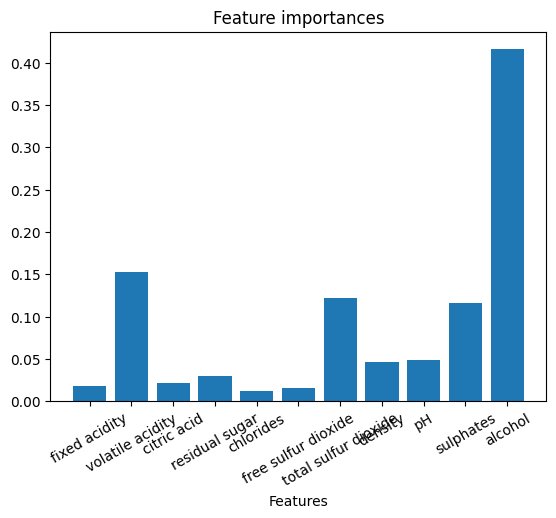

In [17]:
print('9)')
# важливість атрибутів

input('Натисніть Enter для того, щоб вивести графік важливості атрибутів\n')

importances = clf_gini.feature_importances_

fig, ax = plt.subplots()
ax.bar(df.drop('quality', axis=1).columns, importances)
plt.xticks(rotation=30)
ax.set_title('Feature importances')
ax.set_xlabel('Features')
plt.show()